In [1]:
#import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import os
import seaborn as sns
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

#### Datos de Google Maps

El control de la calidad de los datos de los archivos de Google Maps se hizo en las notebooks llamadas Metadata_Sitios y Metadata_Reviews. </br>
A continuación se detallarán brevemente los hallazgos. </br>

In [2]:
# Leo los archivos con datos de Google Maps

df_gm_pizza = pd.read_parquet('maps\\df.parquet' , engine='fastparquet')
df_gm_pizza_rev = pd.read_parquet('maps\\df_estados.parquet' , engine='fastparquet') 

#### Análisis exploratorio de los datos de Google Maps de pizzerías

In [3]:
print(df_gm_pizza[['avg_rating' , 'num_of_reviews']].describe())

       avg_rating  num_of_reviews
count    7.000000        7.000000
mean     4.328571       21.285714
std      0.446148       15.628119
min      3.700000        7.000000
25%      4.100000        8.000000
50%      4.300000       18.000000
75%      4.550000       30.000000
max      5.000000       48.000000


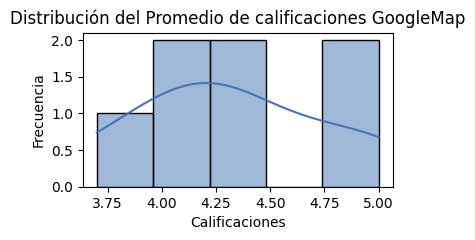

In [4]:
# Distribution of ratings
plt.figure(figsize=(4,2))
sns.histplot(df_gm_pizza['avg_rating'], bins=5, kde=True, color='#4575b4')
plt.title("Distribución del Promedio de calificaciones GoogleMap")
plt.xlabel("Calificaciones")
plt.ylabel("Frecuencia")
plt.show()

In [5]:
print('Estado de CA: \n', df_gm_pizza.loc[df_gm_pizza['state'] == 'CA', ['avg_rating', 'num_of_reviews']].describe() , '\n')
print('Estado de GA: \n', df_gm_pizza.loc[df_gm_pizza['state'] == 'GA', ['avg_rating', 'num_of_reviews']].describe())
print('Estado de NV: \n', df_gm_pizza.loc[df_gm_pizza['state'] == 'NV', ['avg_rating', 'num_of_reviews']].describe())

Estado de CA: 
        avg_rating  num_of_reviews
count    5.000000         5.00000
mean     4.480000        18.60000
std      0.408656        11.61034
min      4.000000         7.00000
25%      4.300000         8.00000
50%      4.300000        18.00000
75%      4.800000        26.00000
max      5.000000        34.00000 

Estado de GA: 
        avg_rating  num_of_reviews
count         1.0             1.0
mean          4.2            48.0
std           NaN             NaN
min           4.2            48.0
25%           4.2            48.0
50%           4.2            48.0
75%           4.2            48.0
max           4.2            48.0
Estado de NV: 
        avg_rating  num_of_reviews
count         1.0             1.0
mean          3.7             8.0
std           NaN             NaN
min           3.7             8.0
25%           3.7             8.0
50%           3.7             8.0
75%           3.7             8.0
max           3.7             8.0


In [8]:
# Filtrar para obtener cualquier 'business_name' que contenga 'pizza'
print('Estado de CA: \n', df_gm_pizza.loc[
    (df_gm_pizza['state'] == 'CA') & (df_gm_pizza['business_name'].str.contains('pizza', case=False, na=False)),
    ['avg_rating', 'num_of_reviews']].describe(), '\n')

print('Estado de NV: \n', df_gm_pizza.loc[
    (df_gm_pizza['state'] == 'NV') & (df_gm_pizza['business_name'].str.contains('pizza', case=False, na=False)),
    ['avg_rating', 'num_of_reviews']].describe())

print('Estado de GA: \n', df_gm_pizza.loc[
    (df_gm_pizza['state'] == 'GA') & (df_gm_pizza['business_name'].str.contains('pizza', case=False, na=False)),
    ['avg_rating', 'num_of_reviews']].describe())


Estado de CA: 
        avg_rating  num_of_reviews
count    3.000000        3.000000
mean     4.533333       22.333333
std      0.404145       13.868429
min      4.300000        7.000000
25%      4.300000       16.500000
50%      4.300000       26.000000
75%      4.650000       30.000000
max      5.000000       34.000000 

Estado de NV: 
        avg_rating  num_of_reviews
count         1.0             1.0
mean          3.7             8.0
std           NaN             NaN
min           3.7             8.0
25%           3.7             8.0
50%           3.7             8.0
75%           3.7             8.0
max           3.7             8.0
Estado de GA: 
        avg_rating  num_of_reviews
count         1.0             1.0
mean          4.2            48.0
std           NaN             NaN
min           4.2            48.0
25%           4.2            48.0
50%           4.2            48.0
75%           4.2            48.0
max           4.2            48.0


In [11]:
# Las 10 pizzerías con mejor calificación (mínimo 100 reviews y relacionadas con pizza)
top_pizza = df_gm_pizza[(df_gm_pizza['num_of_reviews'] >= 10) & 
                        (df_gm_pizza['business_name'].str.contains('pizza', case=False, na=False))] \
                .sort_values(by='avg_rating', ascending=False).head(10)

# Las 10 pizzerías con menor calificación (mínimo 100 reviews y relacionadas con pizza)
worst_pizza = df_gm_pizza[(df_gm_pizza['num_of_reviews'] >= 10) & 
                          (df_gm_pizza['business_name'].str.contains('pizza', case=False, na=False))] \
                .sort_values(by='avg_rating', ascending=True).head(10)

print("Las 10 mejores pizzerías:\n", top_pizza[['business_name', 'avg_rating', 'num_of_reviews', 'state']], '\n')
print("Las 10 pizzerías con menor calificación:\n", worst_pizza[['business_name', 'avg_rating', 'num_of_reviews', 'state']])



Las 10 mejores pizzerías:
             business_name  avg_rating  num_of_reviews state
index                                                      
24711         Piara Pizza         4.3              26    CA
6738    PIZZA ROW RECORDS         4.3              34    CA
3496   Jonesy's Pizza Pub         4.2              48    GA 

Las 10 pizzerías con menor calificación:
             business_name  avg_rating  num_of_reviews state
index                                                      
3496   Jonesy's Pizza Pub         4.2              48    GA
24711         Piara Pizza         4.3              26    CA
6738    PIZZA ROW RECORDS         4.3              34    CA


Cantidad de pizzerías con reviews GoogleMap por estado:
 state
CA    5
NV    1
GA    1
Name: count, dtype: int64


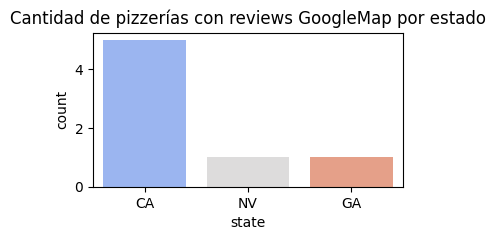

In [12]:
# Contar el número de pizzerías por estado
state_counts = df_gm_pizza['state'].value_counts()

# Imprimir
print("Cantidad de pizzerías con reviews GoogleMap por estado:\n", state_counts)

plt.figure(figsize=(4,2))
sns.countplot(data=df_gm_pizza, x="state", palette="coolwarm")
plt.title("Cantidad de pizzerías con reviews GoogleMap por estado")
plt.show()

##### Analizaremos ahora los datos de reviews de Google Maps

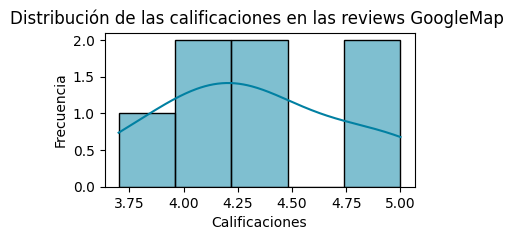

In [16]:
# Distribution of ratings
plt.figure(figsize=(4,2))
sns.histplot(df_gm_pizza_rev['avg_rating'], bins=5, kde=True, color='#0180a2')
plt.title("Distribución de las calificaciones en las reviews GoogleMap ")
plt.xlabel("Calificaciones")
plt.ylabel("Frecuencia")
plt.show()

In [19]:
pizzeria_stats = df_gm_pizza_rev.groupby('business_name').agg(
    num_reviews=('avg_rating', 'count'),  # Count reviews
    avg_rating=('avg_rating', 'mean')  # Average rating
).reset_index()

top_pizzeria_stats = pizzeria_stats.sort_values(by='num_reviews', ascending=False).head(10)

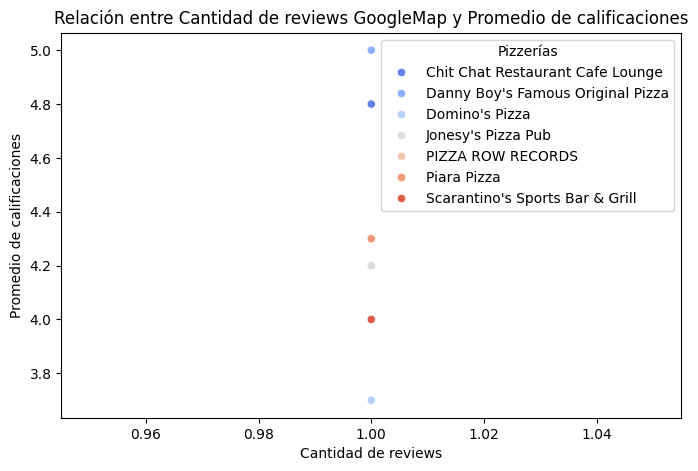

In [20]:
plt.figure(figsize=(8,5))
sns.scatterplot(data= top_pizzeria_stats, x="num_reviews", y="avg_rating", hue="business_name", palette="coolwarm")
plt.title("Relación entre Cantidad de reviews GoogleMap y Promedio de calificaciones")
plt.xlabel("Cantidad de reviews")
plt.ylabel("Promedio de calificaciones")
plt.legend(title="Pizzerías")
plt.show()

Podríamos decir que mayor cantidad de reviews indicaría mas popularidad. Pero pareciera que la relación entre cantidad de reviews y promedio de calificaciones sería inversamente proporcional. La calificación sería menor a mayor cantidad de reviews.

</br>

#### Datos de Yelp

El control de la calidad de los datos de los archivos de Yelp se hizo en las notebooks llamadas Yelp Business y Yelp Business Reviews. </br>
A continuación se detallarán brevemente los hallazgos. </br>

El dataframe yelp_academic_dataset_business tenia 150.346 filas. Se eliminarons las columnas "is_open", "attributes",  "hours" que no se usarán. 103 filas tenían valor nulo en la columna categories. Estas filas se descartaron cuando se seleccionaron filas de acuerdo al valor de esa columna.
Se seleccionaron 717 filas que tenian categoría 'pizza' y eran del estado de New Jersey. No hay datos de pizzerias que esten unicadas en el estado de New York. </br>
No se encontraron filas con valores duplicados. No se modificaron los tipos de datos. </br>
La columna star (calificación) tiene un rango de valores de 1.0 a 5.0. La media de calificación promedio es 3.4 . </br>
Se buscaron posibles outliers en la columna review_count. Se encontraron 3 locales con mas de 300 reseñas pero se supuso que eran valores posibles.</br>
Se eliminó la columna categories, luego de usarla.

El dataframe reviews de Yelp tiene 6.990.280 reviews. No tiene valores nulos para la columna text (con los comentarios de las reseñas) ni para la columna stars (con la calificacion). No hay filas con valores duplicados. Los tipos de datos no se modificaron. </br>
Este dataframe se unió con el de pizzerias para el departamento de NJ para conocer el nombre del local y los otros datos de cada pizzeria. </br>
Se encontraron 28.766 reseñas de Yelp para las pizzerias del estado de NJ. No hay filas con user_id nulo por lo que todas las pizzerias tendrían alguna review.</br>

In [23]:
# Leo los archivos con datos de Yelp
Yelp_pizza = pd.read_parquet('Yelp\\business.parquet' , engine='fastparquet')
Yelp_pizza_rev = pd.read_parquet('Yelp\\business_pizza_rev.parquet' , engine='fastparquet')

#### Análisis exploratorio de los datos de Yelp de pizzerías

In [24]:
print(Yelp_pizza[['stars' , 'review_count']].describe())

            stars  review_count
count  635.000000    635.000000
mean     3.374016     63.645669
std      0.823474    138.224143
min      1.000000      5.000000
25%      3.000000     14.000000
50%      3.500000     28.000000
75%      4.000000     67.000000
max      5.000000   2588.000000


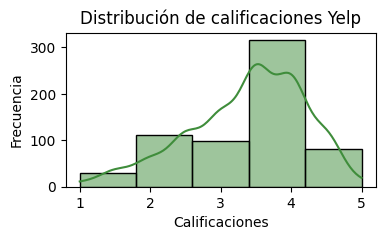

In [25]:
# Distribution of ratings
plt.figure(figsize=(4,2))
sns.histplot(Yelp_pizza['stars'], bins=5, kde=True, color='#3f8d3b')
plt.title("Distribución de calificaciones Yelp")
plt.xlabel("Calificaciones")
plt.ylabel("Frecuencia")
plt.show()

In [26]:
print('Pizzerías relacionadas con pizza: \n', Yelp_pizza.loc[
    Yelp_pizza['name'].str.contains('pizza', case=False, na=False),
    ['stars', 'review_count']].describe())


Pizzerías relacionadas con pizza: 
             stars  review_count
count  367.000000    367.000000
mean     3.222071     51.455041
std      0.870198     99.418844
min      1.000000      5.000000
25%      2.500000     12.000000
50%      3.500000     23.000000
75%      4.000000     47.500000
max      5.000000   1293.000000


In [27]:
# Las 10 pizzerías con mejor calificacion (mínimo 20 reviews)
top_pizza = Yelp_pizza[Yelp_pizza['review_count'] >= 20].sort_values(by='stars', ascending=False).head(10)

# Las 10 pizzerías con menor calificacion (mínimo 100 reviews)
worst_pizza = Yelp_pizza[Yelp_pizza['review_count'] >= 20].sort_values(by='stars', ascending=True).head(10)

print("Las 10 mejores pizzerías:\n", top_pizza[['name', 'stars', 'review_count']], '\n')
print("Las 10 pizzerías con menor calificación:\n", worst_pizza[['name', 'stars', 'review_count']])


Las 10 mejores pizzerías:
                                         name  stars  review_count
index                                                            
87525   Pie12 Napoletana Coal Fired Pizzeria    5.0            80
21388                   First Stop Bake Shop    5.0            23
107523                       Giuliano's Deli    5.0            32
103613                     Five Points Pizza    4.5          1293
9257                   Chris's Sandwich Shop    4.5            32
9962              Salvo's Pizza of Hermitage    4.5            97
88976                             Rize Pizza    4.5           134
101107                           Arcadia Bar    4.5            34
26266                           The Stillery    4.5          2588
30295                      Auggie's Pizzeria    4.5            31 

Las 10 pizzerías con menor calificación:
                      name  stars  review_count
index                                         
28853           Pizza Hut    1.0           

In [29]:
# Las 10 pizzerías con mejor calificación (mínimo 10 reviews y relacionadas con pizza)
top_pizza = Yelp_pizza[(Yelp_pizza['review_count'] >= 10) & 
                       (Yelp_pizza['name'].str.contains('pizza', case=False, na=False))] \
                .sort_values(by='stars', ascending=False).head(10)

print("Los 10 locales relacionados con pizza con mejores calificaciones:\n", 
      top_pizza[['name', 'stars', 'review_count']])


Los 10 locales relacionados con pizza con mejores calificaciones:
                                   name  stars  review_count
index                                                      
51148                 Prospero's Pizza    5.0            11
3898                      Ramble Pizza    4.5            19
133715                    Roma's Pizza    4.5            83
137561         Liliana's Pizza & Grill    4.5            28
129398  Manhattan Famous Pizza & Gyros    4.5            43
9962        Salvo's Pizza of Hermitage    4.5            97
30582   Sal & Joe's Pizza & Restaurant    4.5           117
103613               Five Points Pizza    4.5          1293
53881                        MOD Pizza    4.5           114
53245           Enzo's Pizza And Pasta    4.5            29


##### Analizaremos ahora los datos de reviews de Yelp

In [30]:
Yelp_pizza_rev['date'].agg(['min', 'max'])

min   2005-04-10 23:10:56
max   2022-01-19 19:03:21
Name: date, dtype: datetime64[ns]

In [31]:
#  Extraer el año de la columna 'date'
Yelp_pizza_rev['year'] = Yelp_pizza_rev['date'].dt.year

# Contar el número de reseñas por año
Yelp_reviews_per_year = Yelp_pizza_rev['year'].value_counts().sort_index()

In [32]:
Yelp_reviews_per_year.describe

<bound method NDFrame.describe of year
2005       4
2006      29
2007      79
2008     251
2009     355
2010     715
2011    1156
2012    1430
2013    2100
2014    2837
2015    4117
2016    4613
2017    4931
2018    5394
2019    5590
2020    3860
2021    4295
2022     190
Name: count, dtype: int64>

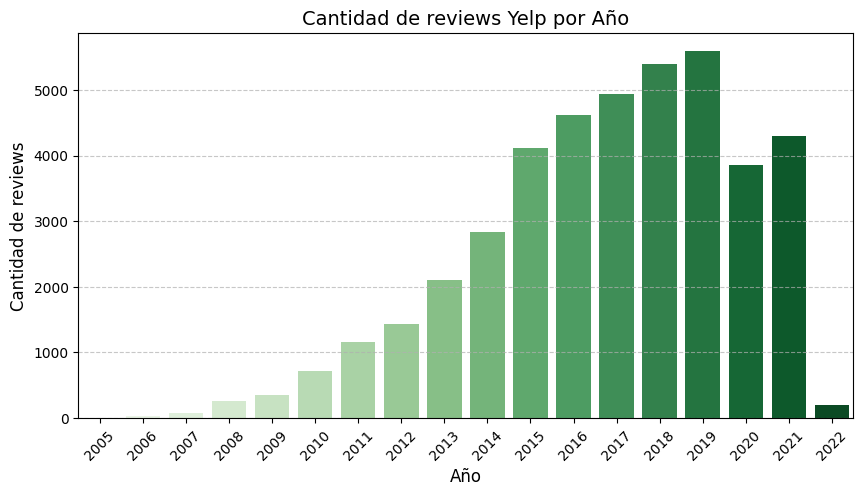

In [33]:
# Grafico la cantidad de reviews para cada año desde 2006 a 2022

plt.figure(figsize=(10, 5))
sns.barplot(x=Yelp_reviews_per_year.index, y=Yelp_reviews_per_year.values, palette='Greens')

plt.title('Cantidad de reviews Yelp por Año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Cantidad de reviews', fontsize=12)
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

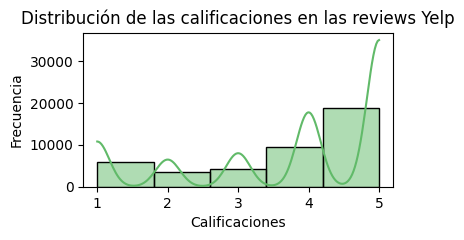

In [34]:
# Distribution of ratings
plt.figure(figsize=(4,2))
sns.histplot(Yelp_pizza_rev['stars_by_user'], bins=5, kde=True, color='#61ba69')
plt.title("Distribución de las calificaciones en las reviews Yelp")
plt.xlabel("Calificaciones")
plt.ylabel("Frecuencia")
plt.show()

In [35]:
pizzeria_stats = Yelp_pizza_rev.groupby('name').agg(
    num_reviews=('stars_by_user', 'count'),  # Count reviews
    avg_rating=('stars_by_user', 'mean')  # Average rating
).reset_index()

top_pizzeria_stats = pizzeria_stats.sort_values(by='num_reviews', ascending=False).head(10)

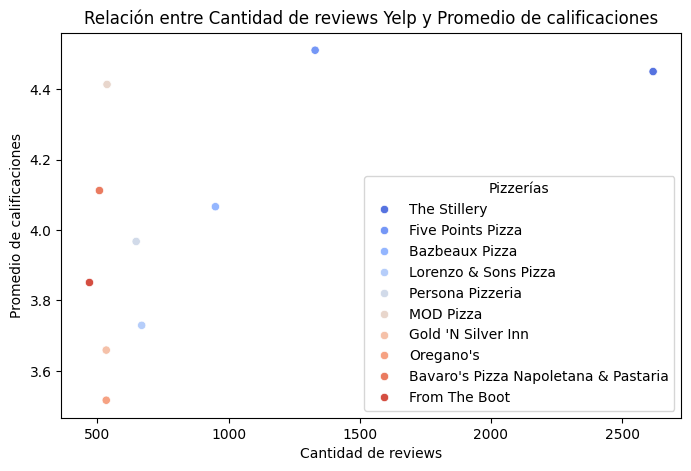

In [36]:
plt.figure(figsize=(8,5))
sns.scatterplot(data= top_pizzeria_stats, x="num_reviews", y="avg_rating", hue="name", palette="coolwarm")
plt.title("Relación entre Cantidad de reviews Yelp y Promedio de calificaciones")
plt.xlabel("Cantidad de reviews")
plt.ylabel("Promedio de calificaciones")
plt.legend(title="Pizzerías")
plt.show()

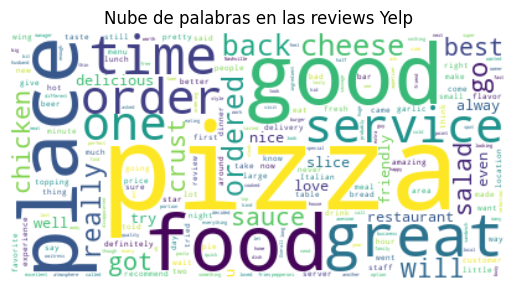

In [37]:
#Creating the text variable

df = Yelp_pizza_rev.dropna(subset=['text'])

text2 = " ".join(text for text in df['text'])

# Creating word_cloud with text as argument in .generate() method
word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)

# Display the generated Word Cloud
plt.imshow(word_cloud2, interpolation='bilinear')
plt.title(f"Nube de palabras en las reviews Yelp")
plt.axis("off")
plt.show()

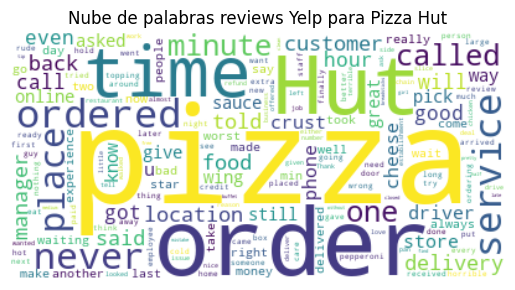

In [38]:
df_hut = Yelp_pizza_rev[Yelp_pizza_rev['name'] == 'Pizza Hut']
df = df_hut.dropna(subset=['text'])

text2 = " ".join(text for text in df['text'])

# Creating word_cloud with text as argument in .generate() method
word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)

# Display the generated Word Cloud
plt.imshow(word_cloud2, interpolation='bilinear')
plt.title(f"Nube de palabras reviews Yelp para Pizza Hut")
plt.axis("off")
plt.show()